# HW4_Part2_HsienHaoHsu

In [369]:
%matplotlib notebook
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

## Question 1

### Step 1

In [314]:
abalone = pd.read_csv('Abalone.csv')

In [315]:
abalone

,V1,V2,V3,V4,V5,V6,V7,V8,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,1
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,3
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,3
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,2
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,3


#### number of cases: 4177
#### number of features per cases: 8
#### number of original classes: 3
#### Class 3: high value, Class 2: medium value, Class 1: low value

#### Feature—/—Name———————/—Data Type——/—Measurement Unit——/—Description
#### —V1——/—Sex————————/—nominal——/—————————————/—M (Male), F (Female), and I (Infant), 3 distinct values
#### —V2——/—Length——————/—continuous—/——————mm—————/—Longest shell measurement
#### —V3——/—Diameter—————/—continuous—/——————mm—————/—perpendicular to length
#### —V4——/—Height———————/—continuous—/—————mm—————/—with meat in shell
#### —V5——/—Whole weight———/—continuous—/—————grams————/—whole abalone
#### —V6——/—Shucked weight——/—continuous—/—————grams————/—weight of meat
#### —V7——/—Viscera weight———/—continuous—/—————grams————/—gut weight (after bleeding)
#### —V8——/—Shell weight————/—continuous—/—————grams————/—after being dried 

### Step 2

In [316]:
ab1 = pd.DataFrame(columns = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','class']) 
ab2 = pd.DataFrame(columns = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','class']) 
ab3 = pd.DataFrame(columns = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','class']) 
x1 = 0
x2 = 0
x3 = 0
for i in range(abalone.shape[0]):
    if abalone.loc[i]['Class'] == 1:
        ab1.loc[x1,2:11] = abalone.loc[i].values
        if abalone.loc[i][0] == 'M':
            ab1.iloc[x1,0:3] = [1,0,0]
        elif abalone.loc[i][0] == 'F':
            ab1.iloc[x1,0:3] = [0,1,0]
        else:
            ab1.iloc[x1,0:3] = [0,0,1]
        x1 += 1
    elif abalone.loc[i]['Class'] == 2:
        ab2.loc[x2,2:11] = abalone.loc[i].values
        if abalone.loc[i][0] == 'M':
            ab2.iloc[x2,0:3] = [1,0,0]
        elif abalone.loc[i][0] == 'F':
            ab2.iloc[x2,0:3] = [0,1,0]
        else:
            ab2.iloc[x2,0:3] = [0,0,1]
        x2 += 1
    elif abalone.loc[i]['Class'] == 3:
        ab3.loc[x3,2:11] = abalone.loc[i].values
        if abalone.loc[i][0] == 'M':
            ab3.iloc[x3,0:3] = [1,0,0]
        elif abalone.loc[i][0] == 'F':
            ab3.iloc[x3,0:3] = [0,1,0]
        else:
            ab3.iloc[x3,0:3] = [0,0,1]
        x3 += 1

In [317]:
abalone1 = ab1.sample(n=2500,replace = True).drop('class',axis=1)
abalone2 = ab2.sample(n=2500,replace = True).drop('class',axis=1)
abalone3 = ab3.sample(n=2500,replace = True).drop('class',axis=1)

In [318]:
mean_ab1 = np.zeros(7);std_ab1 = np.zeros(7);
mean_ab2 = np.zeros(7);std_ab2 = np.zeros(7);
mean_ab3 = np.zeros(7);std_ab3 = np.zeros(7)
for i in range(7):
    mean_ab1[i] = np.mean(abalone1.values[:,i+3])
    std_ab1[i] = np.std(abalone1.values[:,i+3])
    mean_ab2[i] = np.mean(abalone2.values[:,i+3])
    std_ab2[i] = np.std(abalone2.values[:,i+3])
    mean_ab3[i] = np.mean(abalone3.values[:,i+3])
    std_ab3[i] = np.std(abalone3.values[:,i+3])
print('mean of each continuous features(v4 to v10) in class 1:',mean_ab1)
print('standard deviation of each continuous features(v4 to v10) in class 1:',std_ab1)
print('mean of each continuous features(v4 to v10) in class 2:',mean_ab2)
print('standard deviation of each continuous features(v4 to v10) in class 2:',std_ab2)
print('mean of each continuous features(v4 to v10) in class 3:',mean_ab3)
print('standard deviation of each continuous features(v4 to v10) in class 3:',std_ab3)

mean of each continuous features(v4 to v10) in class 1: [ 0.419394   0.3196     0.106304   0.4270498  0.1951956  0.0921668
  0.1202754]
standard deviation of each continuous features(v4 to v10) in class 1: [ 0.11041514  0.08966772  0.04293157  0.3066836   0.14769668  0.06834326
  0.08065249]
mean of each continuous features(v4 to v10) in class 2: [ 0.55798    0.43531    0.147836   0.9135302  0.4094468  0.2014804
  0.2557892]
standard deviation of each continuous features(v4 to v10) in class 2: [ 0.08606021  0.06993035  0.02910734  0.39245971  0.19288237  0.08956127
  0.10121993]
mean of each continuous features(v4 to v10) in class 3: [ 0.591402   0.465998   0.164184   1.1286688  0.4670214  0.244414
  0.3340172]
standard deviation of each continuous features(v4 to v10) in class 3: [ 0.08236555  0.06776204  0.02914368  0.45670136  0.21695806  0.10274188
  0.13035062]


<IPython.core.display.Javascript object>


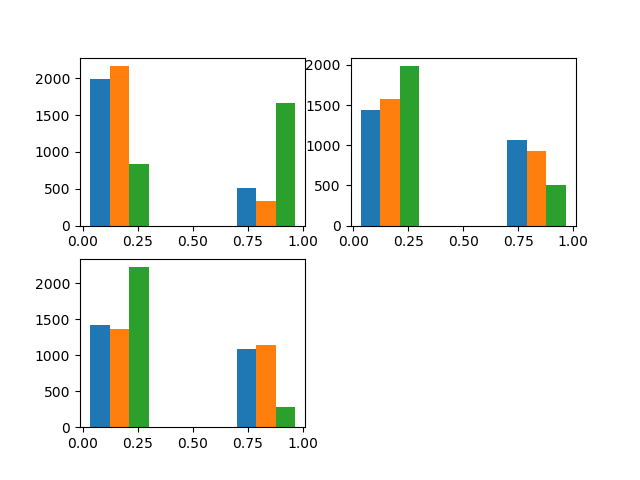

([array([ 1417.,     0.,  1083.]),
  array([ 1363.,     0.,  1137.]),
  array([ 2220.,     0.,   280.])],
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ]),
 <a list of 3 Lists of Patches objects>)

In [319]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.array(abalone1.iloc[:,0:3]), bins=3)
ax2.hist(np.array(abalone2.iloc[:,0:3]), bins=3)
ax3.hist(np.array(abalone3.iloc[:,0:3]), bins=3)

#### I make the nominal feature SEX which include (M, F, I) three values transform into three binary features and be replaced by them.

#### # of total cases in RDS: 6000 cases
#### # of actually kept features per case: 7 original features + 3 binary features from the nominal feature SEX = 10 features
#### # of classes kept and their names: 3 classes => Class 1, 2, 3 and each of them I had clone them to be 2000 cases in each class

#### Feature—/—Name———————/—Data Type——/—Measurement Unit——/—Description
#### —V1——/—Male————————/—discrete——/—————————————/—value 1 if it's Male, 0 for others
#### —V2——/—Female———————/—discrete——/—————————————/—value 1 if it's Female, 0 for others
#### —V3——/—Infant———————/—discrete——/—————————————/—value 1 if it's Infant, 0 for others
#### —V4——/—Length——————/—continuous—/——————mm—————/—Longest shell measurement
#### —V5——/—Diameter—————/—continuous—/——————mm—————/—perpendicular to length
#### —V6——/—Height———————/—continuous—/—————mm—————/—with meat in shell
#### —V7——/—Whole weight———/—continuous—/—————grams————/—whole abalone
#### —V8——/—Shucked weight——/—continuous—/—————grams————/—weight of meat
#### —V9——/—Viscera weight———/—continuous—/—————grams————/—gut weight (after bleeding)
#### —V10——/—Shell weight————/—continuous—/—————grams————/—after being dried 

### Step 3

In [323]:
s1_train, s1_test, s2_train, s2_test, s3_train, s3_test = train_test_split(abalone1, abalone2, abalone3,test_size=0.2)
mean_aba1 = np.zeros(10);std_aba1 = np.zeros(10);
mean_aba2 = np.zeros(10);std_aba2 = np.zeros(10);
mean_aba3 = np.zeros(10);std_aba3 = np.zeros(10)
for i in range(10):
    mean_aba1[i] = np.mean(s1_train.values[:,i])
    std_aba1[i] = np.std(s1_train.values[:,i])
    mean_aba2[i] = np.mean(s2_train.values[:,i])
    std_aba2[i] = np.std(s2_train.values[:,i])
    mean_aba3[i] = np.mean(s3_train.values[:,i])
    std_aba3[i] = np.std(s3_train.values[:,i])

In [324]:
s1_train = (s1_train-mean_aba1)/std_aba1
s2_train = (s2_train-mean_aba2)/std_aba2
s3_train = (s3_train-mean_aba3)/std_aba3
s1_test = (s1_test-mean_aba1)/std_aba1
s2_test = (s2_test-mean_aba2)/std_aba2
s3_test = (s3_test-mean_aba3)/std_aba3

In [325]:
train = pd.concat([s1_train,s2_train,s3_train])
test = pd.concat([s1_test,s2_test,s3_test])

#### Sizes of the classes within TRAIN and within TEST: 
#### Train: 1600 cases in Class 1, 1600 cases in Class 2, 1600 cases in Class 3
#### Test: 400 cases in Class 1, 400 cases in Class 2, 400 cases in Class 3
#### Sizes of TRAIN and TEST: (4800,1200) cases

## Question 2

### Step 1

In [326]:
train12 = pd.concat([s1_train,s2_train])
x12 = np.array([1, 2])
true_tr12 = np.repeat(x12, [2000, 2000])

In [327]:
def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10]
    gammas = [0.01, 0.1, 1, 10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    Table = pd.DataFrame(grid_search.fit(X, y).cv_results_)
    table=Table[['param_C','param_gamma','mean_train_score','std_train_score','mean_test_score','std_test_score']]
    return grid_search.best_params_,table

In [328]:
print('The best parameters {cost, gamma} for CL1 and CL2 are:')
svc_param_selection(train12, true_tr12)

The best parameters {cost, gamma} for CL1 and CL2 are:


({'C': 10, 'gamma': 0.1},
    param_C param_gamma  mean_train_score  std_train_score  mean_test_score  \
 0     0.01        0.01          0.557833         0.007173          0.55500   
 1     0.01         0.1          0.718556         0.003402          0.71775   
 2     0.01           1          0.815611         0.001920          0.81525   
 3     0.01          10          0.646639         0.004991          0.64300   
 4      0.1        0.01          0.582972         0.014206          0.57675   
 5      0.1         0.1          0.970444         0.001231          0.96900   
 6      0.1           1          0.996972         0.000420          0.99475   
 7      0.1          10          0.795028         0.001603          0.77925   
 8        1        0.01          0.733556         0.007189          0.72475   
 9        1         0.1          0.999194         0.000828          0.99850   
 10       1           1          1.000000         0.000000          0.99900   
 11       1          10   

### Step 2

In [329]:
train13 = pd.concat([s1_train,s3_train])
x13 = np.array([1, 3])
true_tr13 = np.repeat(x12, [2000, 2000])
print('The best parameters {cost, gamma} for CL1 and CL3 are:')
svc_param_selection(train13, true_tr13)

The best parameters {cost, gamma} for CL1 and CL3 are:


({'C': 1, 'gamma': 0.1},
    param_C param_gamma  mean_train_score  std_train_score  mean_test_score  \
 0     0.01        0.01          0.549444         0.008572          0.54825   
 1     0.01         0.1          0.766806         0.003510          0.76675   
 2     0.01           1          0.816250         0.001587          0.81500   
 3     0.01          10          0.643250         0.004580          0.63875   
 4      0.1        0.01          0.577250         0.010964          0.57425   
 5      0.1         0.1          0.982861         0.001658          0.98125   
 6      0.1           1          0.994250         0.000482          0.99100   
 7      0.1          10          0.786750         0.001667          0.77325   
 8        1        0.01          0.815083         0.002130          0.81300   
 9        1         0.1          1.000000         0.000000          1.00000   
 10       1           1          1.000000         0.000000          0.99850   
 11       1          10    

### Base on above 2 steps, I fix my own best parameters as C=5.5, gamma=0.1

## Question 3

In [330]:
x1 = np.array([1, 0])
true_tr1 = np.repeat(x1, [2000, 4000])
x2 = np.array([0, 2, 0])
true_tr2 = np.repeat(x2, [2000, 2000, 2000])
x3 = np.array([0, 3])
true_tr3 = np.repeat(x3, [4000, 2000])
radio_svc1 = svm.SVC(kernel='rbf',C=5.5,gamma=0.1,degree=2)
radio_svc2 = svm.SVC(kernel='rbf',C=5.5,gamma=0.1,degree=2)
radio_svc3 = svm.SVC(kernel='rbf',C=5.5,gamma=0.1,degree=2)
radio_svc1.fit(train,true_tr1)
radio_svc2.fit(train,true_tr2)
radio_svc3.fit(train,true_tr3)

SVC(C=5.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [331]:
true_te1 = np.repeat(x1, [500, 1000])
true_te2 = np.repeat(x2, [500, 500, 500])
true_te3 = np.repeat(x3, [1000, 500])

In [332]:
predtrain1 = radio_svc1.predict(train)
predtest1 = radio_svc1.predict(test)
ctr1 = confusion_matrix(true_tr1, predtrain1)
cte1 = confusion_matrix(true_te1, predtest1)
print('confusion matrix of SVM1 training set: \n',ctr1/[[4000,4000],[2000,2000]])
print('confusion matrix of SVM1 test set: \n',cte1/[[1000,1000],[500,500]])

confusion matrix of SVM1 training set: 
 [[ 1.  0.]
 [ 0.  1.]]
confusion matrix of SVM1 test set: 
 [[ 0.999  0.001]
 [ 0.     1.   ]]


In [333]:
predtrain2 = radio_svc2.predict(train)
predtest2 = radio_svc2.predict(test)
ctr2 = confusion_matrix(true_tr2, predtrain2)
cte2 = confusion_matrix(true_te2, predtest2)
print('confusion matrix of SVM2 training set: \n',ctr2/[[4000,4000],[2000,2000]])
print('confusion matrix of SVM2 test set: \n',cte2/[[1000,1000],[500,500]])

confusion matrix of SVM2 training set: 
 [[ 0.99675  0.00325]
 [ 0.01     0.99   ]]
confusion matrix of SVM2 test set: 
 [[ 0.993  0.007]
 [ 0.016  0.984]]


In [364]:
predtrain3 = radio_svc3.predict(train)
predtest3 = radio_svc3.predict(test)
ctr3 = confusion_matrix(true_tr3, predtrain3)
cte3 = confusion_matrix(true_te3, predtest3)
print('confusion matrix of SVM3 training set: \n',ctr3/[[4000,4000],[2000,2000]])
print('confusion matrix of SVM3 test set: \n',cte3/[[1000,1000],[500,500]])

confusion matrix of SVM3 training set: 
 [[  1.00000000e+00   0.00000000e+00]
 [  5.00000000e-04   9.99500000e-01]]
confusion matrix of SVM3 test set: 
 [[ 0.999  0.001]
 [ 0.008  0.992]]


In [335]:
acctr1 = (ctr1[0][0]+ctr1[1][1])/6000
print('the 95% confidence interval for SVM1 training set:',
     (acctr1-1.6*math.sqrt(acctr1*(1-acctr1)/6000),acctr1+1.6*math.sqrt(acctr1*(1-acctr1)/6000)))
accte1 = (cte1[0][0]+cte1[1][1])/1500
print('the 95% confidence interval for SVM1 test set:',
      (accte1-1.6*math.sqrt(accte1*(1-accte1)/1500),accte1+1.6*math.sqrt(accte1*(1-accte1)/1500)))

the 95% confidence interval for SVM1 training set: (1.0, 1.0)
the 95% confidence interval for SVM1 test set: (0.99826702228150122, 1.0003996443851655)


In [336]:
acctr2 = (ctr2[0][0]+ctr2[1][1])/6000
print('the 95% confidence interval for SVM2 training set:',
     (acctr2-1.6*math.sqrt(acctr2*(1-acctr2)/6000),acctr2+1.6*math.sqrt(acctr2*(1-acctr2)/6000)))
accte2 = (cte2[0][0]+cte2[1][1])/1500
print('the 95% confidence interval for SVM2 test set:',
      (accte2-1.6*math.sqrt(accte2*(1-accte2)/1500),accte2+1.6*math.sqrt(accte2*(1-accte2)/1500)))

the 95% confidence interval for SVM2 training set: (0.99297233511528216, 0.99602766488471794)
the 95% confidence interval for SVM2 test set: (0.98588952557482712, 0.99411047442517286)


In [337]:
acctr3 = (ctr3[0][0]+ctr3[1][1])/6000
print('the 95% confidence interval for SVM3 training set:',
     (acctr3-1.6*math.sqrt(acctr3*(1-acctr3)/6000),acctr3+1.6*math.sqrt(acctr3*(1-acctr3)/6000)))
accte3 = (cte3[0][0]+cte3[1][1])/1500
print('the 95% confidence interval for SVM3 test set:',
      (accte3-1.6*math.sqrt(accte3*(1-accte3)/1500),accte3+1.6*math.sqrt(accte3*(1-accte3)/1500)))

the 95% confidence interval for SVM3 training set: (0.99956668888981492, 1.0000999777768518)
the 95% confidence interval for SVM3 test set: (0.99428550604085297, 0.99904782729248043)


### Evaluation: From the result above, we can see either my data set is too perfect or the radio kernel svm really do pretty well on my data set. However, we still can see that SVM1 and SVM3 do a slicely better job than SVM2 in this case. Maybe it's because the parameter I used is found by CL1 vs. CL2 and CL1 vs. CL3 so it has a good performance on separate CL1 and Not CL1.

In [338]:
sup1 = radio_svc1.n_support_[0]+radio_svc1.n_support_[1]
error1 = sup1/6000
print('% of SVM1 support vectors: \n',error1)

% of SVM1 support vectors: 
 0.0516666666667


In [339]:
sup2 = radio_svc2.n_support_[0]+radio_svc2.n_support_[1]
error2 = sup2/6000
print('% of SVM2 support vectors: \n',error2)

% of SVM2 support vectors: 
 0.416666666667


In [340]:
sup3 = radio_svc3.n_support_[0]+radio_svc3.n_support_[1]
error3 = sup3/6000
print('% of SVM3 support vectors: \n',error3)

% of SVM3 support vectors: 
 0.2575


### Evaluation: As we know that the less number of support vectors means a good SVM fuction. Therefore, I am more confident on SVM1 then others because of it's 5.17% support vectors. Moreover, as I mention above, I think it might due to the selection of the parameters.

## Question 4

### Describe: take the first input of the training set as an example, if x(1) in SVM1 is define in class 1 then it gets A11 points for class 1 where A11 = upper left of the confusion matrix. if x(1) in SVM1 is define not in class 1 then it gets A22/2 points for both class 2 and class 3 where A22 = lower right of the confusion matrix. Same process for SVM2 and SVM3. Then find the maximum point which class get of each input x(i). If the class that get the max point of input x(1) is class 1 then the prediction for the first input x(1) will be class 1.

In [341]:
a11 = ctr1[0][0]/4000; a22 = ctr1[1][1]/2000; 
b11 = ctr2[0][0]/4000; b22 = ctr2[1][1]/2000; 
c11 = ctr3[0][0]/4000; c22 = ctr3[1][1]/2000 
predtrain4 = np.zeros(6000); x41 = np.zeros(6000); x42 = np.zeros(6000); x43 = np.zeros(6000)
for i in range(6000):
    if predtrain1[i] == 1:
        x41[i] += a11
    elif predtrain1[i] == 0:
        x42[i] += a22/2; x43[i] += a22/2
for i in range(6000):
    if predtrain2[i] == 2:
        x42[i] += b11
    elif predtrain2[i] == 0:
        x41[i] += b22/2; x43[i] += b22/2
for i in range(6000):
    if predtrain3[i] == 3:
        x43[i] += c11
    elif predtrain3[i] == 0:
        x42[i] += c22/2; x41[i] += c22/2
for i in range(6000):
    if max(x41[i],x42[i],x43[i]) == x41[i]:
        predtrain4[i] = 1
    elif max(x41[i],x42[i],x43[i]) == x42[i]:
        predtrain4[i] = 2
    else:
        predtrain4[i] = 3

In [342]:
d11 = cte1[0][0]/1000; d22 = ctr1[1][1]/500; 
e11 = ctr2[0][0]/1000; e22 = ctr2[1][1]/500; 
f11 = ctr3[0][0]/1000; f22 = ctr3[1][1]/500 
predtest4 = np.zeros(1500); x411 = np.zeros(1500); x422 = np.zeros(1500); x433 = np.zeros(1500)
for i in range(1500):
    if predtest1[i] == 1:
        x411[i] += d11
    elif predtest1[i] == 0:
        x422[i] += d22/2; x433[i] += d22/2
for i in range(1500):
    if predtest2[i] == 2:
        x422[i] += e11
    elif predtest2[i] == 0:
        x411[i] += e22/2; x433[i] += e22/2
for i in range(1500):
    if predtest3[i] == 3:
        x433[i] += f11
    elif predtest3[i] == 0:
        x422[i] += f22/2; x411[i] += f22/2
for i in range(1500):
    if max(x411[i],x422[i],x433[i]) == x411[i]:
        predtest4[i] = 1
    elif max(x411[i],x422[i],x433[i]) == x422[i]:
        predtest4[i] = 2
    else:
        predtest4[i] = 3

In [343]:
x4 = np.array([1,2,3])
true_tr4 = np.repeat(x4,[2000,2000,2000])
true_te4 = np.repeat(x4,[500,500,500])
ctr4 = confusion_matrix(true_tr4, predtrain4)
cte4 = confusion_matrix(true_te4, predtest4)
print('confusion matrix of Q4 training set: \n',ctr4/2000)
print('confusion matrix of Q4 test set: \n',cte4/500)

confusion matrix of Q4 training set: 
 [[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.00000000e-04   9.99500000e-01]]
confusion matrix of Q4 test set: 
 [[ 0.998  0.002  0.   ]
 [ 0.002  0.996  0.002]
 [ 0.     0.008  0.992]]


In [344]:
acctr4 = (ctr4[0][0]+ctr4[1][1]+ctr4[2][2])/6000
print('the accuracy for Q4 training set:',acctr4)
print('the 95% confidence interval for Q4 training set:',
     (acctr4-1.6*math.sqrt(acctr4*(1-acctr4)/6000),acctr4+1.6*math.sqrt(acctr4*(1-acctr4)/6000)))
accte4 = (cte4[0][0]+cte4[1][1]+cte4[2][2])/1500
print('the accuracy for Q4 test set:',accte4)
print('the 95% confidence interval for Q4 test set:',
      (accte4-1.6*math.sqrt(accte4*(1-accte4)/1500),accte4+1.6*math.sqrt(accte4*(1-accte4)/1500)))

the accuracy for Q4 training set: 0.999833333333
the 95% confidence interval for Q4 training set: (0.99956668888981492, 1.0000999777768518)
the accuracy for Q4 test set: 0.995333333333
the 95% confidence interval for Q4 test set: (0.99251779128302808, 0.9981488753836385)


### Evaluation: Because SVM1, SVM2 and SVM3 are all do very well as Question 3 presrnt on this classifcation, the combinations of these SVMs are also doing well on training set and test set. Moreover, the accuracy for the training set is a little bit bigger than the accuracy for the test set so it makes sence.

## Question 5

### Repeat Q2

In [345]:
def svc_param_selection1(X, y):
    Cs = [0.01, 0.1, 1, 10]
    param_grid = {'C': Cs, 'gamma' : [1], 'degree' : [2], 'coef0' : [1]}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    Table = pd.DataFrame(grid_search.fit(X, y).cv_results_)
    table=Table[['param_C','mean_train_score','std_train_score','mean_test_score','std_test_score']]
    return grid_search.best_params_,table

In [346]:
print('The best parameter cost for CL1 and CL2 is the first entry below:')
svc_param_selection1(train12, true_tr12)

The best parameter cost for CL1 and CL2 is the first entry below:


({'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 1},
   param_C  mean_train_score  std_train_score  mean_test_score  std_test_score
 0    0.01          0.815611          0.00192          0.81525        0.022233
 1     0.1          0.996972          0.00042          0.99475        0.003250
 2       1          1.000000          0.00000          0.99900        0.001658
 3      10          1.000000          0.00000          0.99900        0.001658)

In [347]:
print('The best parameter cost for CL1 and CL3 is the first entry below:')
svc_param_selection1(train13, true_tr13)

The best parameter cost for CL1 and CL3 is the first entry below:


({'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 1},
   param_C  mean_train_score  std_train_score  mean_test_score  std_test_score
 0    0.01           0.81625         0.001587           0.8150        0.022220
 1     0.1           0.99425         0.000482           0.9910        0.004213
 2       1           1.00000         0.000000           0.9985        0.002000
 3      10           1.00000         0.000000           0.9985        0.002000)

#### Base on above 2 steps, I fix my own best parameters as C=1

### Repeat Q3

In [348]:
poly_svc1 = svm.SVC(kernel='poly',C=1,coef0=1,degree=2,gamma=1)
poly_svc2 = svm.SVC(kernel='poly',C=1,coef0=1,degree=2,gamma=1)
poly_svc3 = svm.SVC(kernel='poly',C=1,coef0=1,degree=2,gamma=1)
poly_svc1.fit(train,true_tr1)
poly_svc2.fit(train,true_tr2)
poly_svc3.fit(train,true_tr3)

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [349]:
predtrain51 = poly_svc1.predict(train)
predtest51 = poly_svc1.predict(test)
ctr51 = confusion_matrix(true_tr1, predtrain51)
cte51 = confusion_matrix(true_te1, predtest51)
print('confusion matrix of SVM1 training set: \n',ctr51/[[4000,4000],[2000,2000]])
print('confusion matrix of SVM1 test set: \n',cte51/[[1000,1000],[500,500]])

confusion matrix of SVM1 training set: 
 [[ 1.  0.]
 [ 0.  1.]]
confusion matrix of SVM1 test set: 
 [[ 1.  0.]
 [ 0.  1.]]


In [350]:
predtrain52 = poly_svc2.predict(train)
predtest52 = poly_svc2.predict(test)
ctr52 = confusion_matrix(true_tr2, predtrain52)
cte52 = confusion_matrix(true_te2, predtest52)
print('confusion matrix of SVM2 training set: \n',ctr52/[[4000,4000],[2000,2000]])
print('confusion matrix of SVM2 test set: \n',cte52/[[1000,1000],[500,500]])

confusion matrix of SVM2 training set: 
 [[ 0.998   0.002 ]
 [ 0.1115  0.8885]]
confusion matrix of SVM2 test set: 
 [[ 0.998  0.002]
 [ 0.108  0.892]]


In [351]:
predtrain53 = poly_svc3.predict(train)
predtest53 = poly_svc3.predict(test)
ctr53 = confusion_matrix(true_tr3, predtrain53)
cte53 = confusion_matrix(true_te3, predtest53)
print('confusion matrix of SVM3 training set: \n',ctr53/[[4000,4000],[2000,2000]])
print('confusion matrix of SVM3 test set: \n',cte53/[[1000,1000],[500,500]])

confusion matrix of SVM3 training set: 
 [[ 1.  0.]
 [ 0.  1.]]
confusion matrix of SVM3 test set: 
 [[ 1.  0.]
 [ 0.  1.]]


In [365]:
acctr52 = (ctr52[0][0]+ctr52[1][1])/6000
print('the 95% confidence interval for SVM2 training set:',
     (acctr52-1.6*math.sqrt(acctr52*(1-acctr52)/6000),acctr52+1.6*math.sqrt(acctr52*(1-acctr52)/6000)))
accte52 = (cte52[0][0]+cte52[1][1])/1500
print('the 95% confidence interval for SVM2 test set:',
      (accte52-1.6*math.sqrt(accte52*(1-accte52)/1500),accte52+1.6*math.sqrt(accte52*(1-accte52)/1500)))

the 95% confidence interval for SVM2 training set: (0.95752580322580783, 0.96547419677419222)
the 95% confidence interval for SVM2 test set: (0.95483488261183713, 0.97049845072149621)


### Evaluation: It seems that the polynomial kernal does better the the radio kernl. Both SVM1 and SVM3 get 100% accuracy and SVM2 gets 95% accuracy.

In [353]:
sup51 = poly_svc1.n_support_[0]+poly_svc1.n_support_[1]
error51 = sup51/6000
print('% of SVM1 support vectors: \n',error51)

% of SVM1 support vectors: 
 0.106666666667


In [354]:
sup52 = poly_svc2.n_support_[0]+poly_svc2.n_support_[1]
error52 = sup52/6000
print('% of SVM2 support vectors: \n',error52)

% of SVM2 support vectors: 
 0.635833333333


In [355]:
sup53 = poly_svc3.n_support_[0]+poly_svc3.n_support_[1]
error53 = sup53/6000
print('% of SVM3 support vectors: \n',error53)

% of SVM3 support vectors: 
 0.177666666667


### Evaluation: It makes sence that the number of support vectors for SVM2 is extremely higher then SVM1 and SVM3 cause the accuracy is lower.

### Repeat Q4

In [359]:
g11 = ctr51[0][0]/4000; g22 = ctr51[1][1]/2000; 
h11 = ctr52[0][0]/4000; h22 = ctr52[1][1]/2000; 
i11 = ctr53[0][0]/4000; i22 = ctr53[1][1]/2000 
predtrain5 = np.zeros(6000); x51 = np.zeros(6000); x52 = np.zeros(6000); x53 = np.zeros(6000)
for i in range(6000):
    if predtrain51[i] == 1:
        x51[i] += g11
    elif predtrain51[i] == 0:
        x52[i] += g22/2; x53[i] += g22/2
for i in range(6000):
    if predtrain52[i] == 2:
        x52[i] += h11
    elif predtrain52[i] == 0:
        x51[i] += h22/2; x53[i] += h22/2
for i in range(6000):
    if predtrain53[i] == 3:
        x53[i] += i11
    elif predtrain53[i] == 0:
        x52[i] += i22/2; x51[i] += i22/2
for i in range(6000):
    if max(x51[i],x52[i],x53[i]) == x51[i]:
        predtrain5[i] = 1
    elif max(x51[i],x52[i],x53[i]) == x52[i]:
        predtrain5[i] = 2
    else:
        predtrain5[i] = 3

In [360]:
j11 = cte51[0][0]/1000; j22 = ctr51[1][1]/500; 
k11 = ctr52[0][0]/1000; k22 = ctr52[1][1]/500; 
l11 = ctr53[0][0]/1000; l22 = ctr53[1][1]/500 
predtest5 = np.zeros(1500); x511 = np.zeros(1500); x522 = np.zeros(1500); x533 = np.zeros(1500)
for i in range(1500):
    if predtest51[i] == 1:
        x511[i] += j11
    elif predtest51[i] == 0:
        x522[i] += j22/2; x533[i] += j22/2
for i in range(1500):
    if predtest52[i] == 2:
        x522[i] += k11
    elif predtest52[i] == 0:
        x511[i] += k22/2; x533[i] += k22/2
for i in range(1500):
    if predtest53[i] == 3:
        x533[i] += l11
    elif predtest53[i] == 0:
        x522[i] += l22/2; x511[i] += l22/2
for i in range(1500):
    if max(x511[i],x522[i],x533[i]) == x511[i]:
        predtest5[i] = 1
    elif max(x511[i],x522[i],x533[i]) == x522[i]:
        predtest5[i] = 2
    else:
        predtest5[i] = 3

In [361]:
ctr5 = confusion_matrix(true_tr4, predtrain5)
cte5 = confusion_matrix(true_te4, predtest5)
print('confusion matrix of Q5 training set: \n',ctr5/2000)
print('confusion matrix of Q5 test set: \n',cte5/500)

confusion matrix of Q5 training set: 
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
confusion matrix of Q5 test set: 
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### Evaluation: I'm really suprise that the performances of the combination for SVM1, SVM2 and SVM3 are such great even though SVM2 only get 95% accuracy on the performace.